# 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터

In [2]:
df_raw = pd.read_csv('./titanic.csv')
df_raw.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# copy
import copy
df = copy.deepcopy(df_raw)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 데이터 전처리

In [4]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 데이터 요약 정보
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 결측치 처리

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Age 평균 대체

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Age'].isna().sum()

0

##### Cabin 'N' 값 대체

In [8]:
df['Cabin'].fillna('N', inplace = True)
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

##### Cabin 첫 글자 대체

In [9]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

##### Embarked 'N' 값 대체

In [10]:
df['Embarked'].fillna('N', inplace = True)
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

##### 결과 확인

In [11]:
df.isna().sum().sum()

0

### EDA

##### 성별에 따른 생존여부

In [12]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

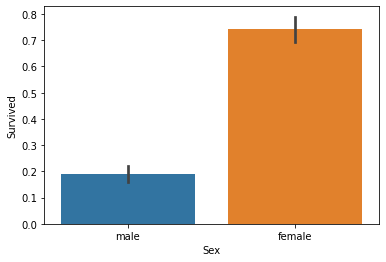

In [13]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)

##### 선실등급과 성별에 따른 생존여부

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

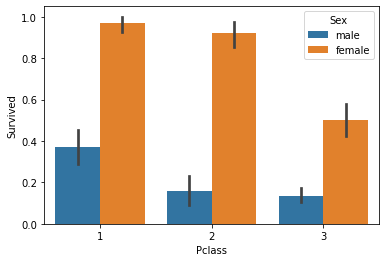

In [14]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

##### 나이대 구분

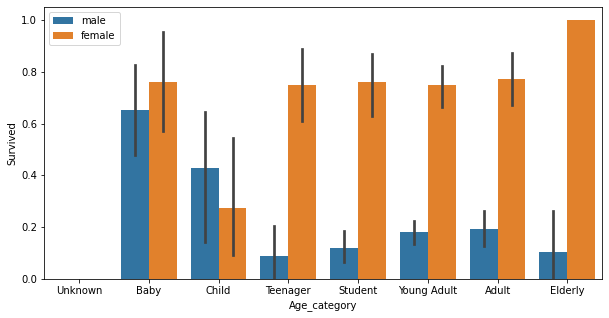

In [15]:
# 연령 구분 함수
def age_category(age) :
    category = ''
    if age <= -1 : category = 'Unknown'
    elif age <= 5 : category = 'Baby'
    elif age <= 12 : category = 'Child'
    elif age <= 18 : category = 'Teenager'
    elif age <= 25 : category = 'Student'
    elif age <= 35 : category = 'Young Adult'
    elif age <= 60 : category = 'Adult'
    else : category = 'Elderly'
        
    return category

# 그래프 생성
plt.figure(figsize = (10,5))

# X축
x_list = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# 연령 구분
df['Age_category'] = df['Age'].apply(lambda x : age_category(x))

# 나이대, 성별에 따른 생존여부
sns.barplot(x = 'Age_category', y = 'Survived', hue = 'Sex', data = df, order = x_list)
plt.legend(loc = 'upper left')
# 연령 구분 변수 제거
df.drop('Age_category', axis = 1, inplace = True)

### Data Encoding

In [16]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Encoding
def encode(data) :
    features = data.select_dtypes(include = 'object')
    encoder = LabelEncoder()
    for feature in features :
        data[feature] = encoder.fit_transform(data[feature])
    
    return data

df = encode(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,7,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,2,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,7,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,2,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,7,3


### 불필요한 변수 제거

In [17]:
df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

# 모델링

### 데이터 분할

In [18]:
# train_test_split
from sklearn.model_selection import train_test_split
# 설명변수, 목표변수 데이터 구분
df_x = df.drop('Survived', axis = 1, inplace = False)
df_y = df['Survived']
# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 11)
print('train data X size :', X_train.shape)
print('train data Y size :', Y_train.shape)
print('test data X size :', X_test.shape)
print('test data Y size :', Y_test.shape)

train data X size : (712, 8)
train data Y size : (712,)
test data X size : (179, 8)
test data Y size : (179,)


### Modeling

In [19]:
# 성능 평가
from sklearn.metrics import accuracy_score

# Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
dt = DTC(random_state = 11)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
print('Decision Tree 정확도 : {:.4f}'.format(accuracy_score(Y_test, dt_pred)))

# Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC(random_state = 11)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print('\nRandom Forest 정확도 : {:.4f}'.format(accuracy_score(Y_test, rf_pred)))

# Logistic Regression
from sklearn.linear_model import LogisticRegression as LR
lr = LR(solver = 'liblinear')
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
print('\nLogistic Regression 정확도 : {:.4f}'.format(accuracy_score(Y_test, lr_pred)))

Decision Tree 정확도 : 0.7877

Random Forest 정확도 : 0.8547

Logistic Regression 정확도 : 0.8659


# 교차 검증

### cross_val_score

In [20]:
# cross_val_score
from sklearn.model_selection import cross_val_score
# Decision Tree
scores = cross_val_score(dt, df_x, df_y, cv = 5)
for n, accuracy in enumerate(scores) :
    print('Decision Tree 교차 검증 {} 정확도 : {:.4f}'.format(n, accuracy))
print('Decision Tree 평균 정확도 : {:.4f}\n'.format(np.mean(scores)))

Decision Tree 교차 검증 0 정확도 : 0.7430
Decision Tree 교차 검증 1 정확도 : 0.7753
Decision Tree 교차 검증 2 정확도 : 0.7921
Decision Tree 교차 검증 3 정확도 : 0.7865
Decision Tree 교차 검증 4 정확도 : 0.8427
Decision Tree 평균 정확도 : 0.7879



# GridSearchCV

### Decision Tree

In [21]:
# time
import time
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# 시작 시간 설정
start_time = time.time()
# parameter
para_grid = {'max_depth' : [2,3,5,10],
             'min_samples_split' : [2,3,5],
             'min_samples_leaf' : [1,5,8]}
# 설명력이 높은 최적 parameter 찾기
grid_dtc = GridSearchCV(dt,
                        para_grid,
                        scoring = 'accuracy',
                        cv = 5)
grid_dtc.fit(X_train, Y_train)
# 결과 확인
print('수행 시간 : {:.0f} 분 {:.0f} 초\n'.format((time.time() - start_time) // 60, (time.time() - start_time) % 60))
print('best estimator model: \n{}'.format(grid_dtc.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dtc.best_params_))
print('\nbest score: \n{:.4f}'.format(grid_dtc.best_score_))
best_dtc = grid_dtc.best_estimator_
best_dtc_pred = best_dtc.predict(X_test)
accuracy = accuracy_score(Y_test, best_dtc_pred)
print('\nTest Data 정확도 : {:.4f}'.format(accuracy))

수행 시간 : 0 분 0 초

best estimator model: 
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=11)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

best score: 
0.7992

Test Data 정확도 : 0.8715
